In [163]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [164]:
thickness = 0.01 # meters
width = 0.1 # meters
height = 0.15 # meters
Ttop = 373 # Kelvin
Tbottom = 273 # Kelvin
Tleft = Tbottom
Tright = Tbottom
nodey = 16
nodex = 11
celly = nodey - 1
cellx = nodex - 1
dx = width/cellx
dy = height/celly
cellArrayx = np.linspace(dx/2,width-dx/2,cellx)
cellArrayy = np.linspace(dy/2,height-dy/2,celly)
cellArrayxExact = np.linspace(0,width,100)
cellArrayyExact = np.linspace(0,height,150)
X,Y = np.meshgrid(cellArrayx,cellArrayy)
XExact,YExact = np.meshgrid(cellArrayxExact,cellArrayyExact)

In [165]:
def exactSol(height, width, X, Y):
    TExact = 0
    for n in range(1,150,2):
        TExact = TExact + 400/math.pi * (1/(n*np.sinh(n*math.pi*height/width)))*np.sinh(n*math.pi*Y/width)*np.sin(n*math.pi*X/width)
    return TExact + 273

In [166]:
exactSolution = exactSol(height,width,XExact,YExact)

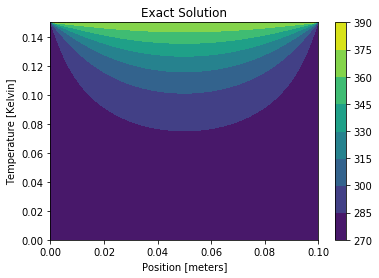

In [167]:
plt.contourf(XExact, YExact, exactSolution)
plt.title('Exact Solution')
plt.xlabel('Position [meters]')
plt.ylabel('Temperature [Kelvin]')
plt.colorbar()

In [168]:
def jacobi(A,RHS,cellNum,relaxFactor):
    tol = 1e-6
    error = 1
    numSol = np.ones_like(RHS)
    numSol_new = np.zeros_like(numSol)
    iterationLimit = 1000
    convergenceHistory = np.zeros((iterationLimit,1))
    for iteration in range(0,iterationLimit):
        numSol_new = np.zeros_like(numSol)
        for i in range(0,cellNum):
            G = 0
            for j in range(0,cellNum):
                if j != i:
                    G = G + A[i,j]*numSol[j,0] 
            numSol_new[i,0] = (1-relaxFactor)*numSol[i,0] + relaxFactor*(RHS[i,0] - G) / A[i, i]
        error = np.linalg.norm(numSol_new-numSol)
        convergenceHistory[iteration] = error
        if error < tol:
            break
        numSol = numSol_new
    return numSol, convergenceHistory

In [169]:
def centralDiff(cellx,celly,relaxFactor):
    A = np.zeros((celly*cellx,cellx*celly))
    RHS = np.zeros((cellx*celly,1))
    cellNum = cellx*celly
    for i in range(0,celly*cellx):
        for j in range(0,cellx*celly):
            if i == 0: # South Left Corner
                if j == 0:
                    A[i,j] = -6
                elif j == 1:
                    A[i,j] = 1
                elif j == 10:
                    A[i,j] = 1
                else:
                    A[i,j] = 0
                RHS[i,0] = -1092
            elif i == 9: # South Right Corner
                if j == 9:
                    A[i,j] = -6
                elif j == 8:
                    A[i,j] = 1
                elif j == 19:
                    A[i,j] = 1
                else:
                    A[i,j] = 0
                RHS[i,0] = -1092
            elif i == 140: # North Left Corner
                if j == 140:
                    A[i,j] = -6
                elif j == 141:
                    A[i,j] = 1
                elif j == 130:
                    A[i,j] = 1
                else:
                    A[i,j] = 0
                RHS[i,0] = -1292
            elif i == 149: # North Right Corner
                if j == 149:
                    A[i,j] = -6
                elif j == 148:
                    A[i,j] = 1
                elif j == 139:
                    A[i,j] = 1
                else:
                    A[i,j] = 0
                RHS[i,0] = -1292
            elif i in [10,20,30,40,50,60,70,80,90,100,110,120]: # Left Boundary
                if j == i:
                    A[i,j] = -5
                elif j == (i+1):
                    A[i,j] = 1
                elif j == (i+10):
                    A[i,j] = 1
                elif j == (i-10):
                    A[i,j] = 1
                else:
                    A[i,j] = 0
                RHS[i,0] = -546
            elif i in [19,29,39,49,59,69,79,89,99,109,119,129,139]: # Right Boundary
                if j == i:
                    A[i,j] = -5
                elif j == (i-1):
                    A[i,j] = 1
                elif j == (i-10):
                    A[i,j] = 1
                elif j == (i+10):
                    A[i,j] = 1
                else:
                    A[i,j] = 0
                RHS[i,0] = -546
            elif i in [1,2,3,4,5,6,7,8]: # South Boundary
                if j == i:
                    A[i,j] = -5
                elif j == (i+1):
                    A[i,j] = 1
                elif j == (i-1):
                    A[i,j] = 1
                elif j == (i+10):
                    A[i,j] = 1
                else:
                    A[i,j] = 0
                RHS[i,0] = -546
            elif i in [141,142,143,144,145,146,147,148]: # North Boundary
                if j == i:
                    A[i,j] = -5
                elif j == (i+1):
                    A[i,j] = 1
                elif j == (i-1):
                    A[i,j] = 1
                elif j == (i-10):
                    A[i,j] = 1
                else:
                    A[i,j] = 0
                RHS[i,0] = -746
            else: # Interior Cells
                if j == i:
                    A[i,j] = -4
                elif j == (i+1):
                    A[i,j] = 1
                elif j == (i-1):
                    A[i,j] = 1
                elif j == (i+10):
                    A[i,j] = 1
                elif j == (i-10):
                    A[i,j] = 1
                RHS[i,0] = 0
            
                
    #numSol = np.linalg.solve(A,RHS)   
    numSol, convergenceHistory = jacobi(A,RHS,cellNum,relaxFactor)
    
    Tmatrix = np.zeros((celly,cellx))
    
    for i in range(0,cellx*celly):
        if i in range(0,10):
            Tmatrix[0,i] = numSol[i]
        elif i in range(10,20):
            Tmatrix[1,i-10] = numSol[i]
        elif i in range(20,30):
            Tmatrix[2,i-20] = numSol[i]
        elif i in range(30,40):
            Tmatrix[3,i-30] = numSol[i]
        elif i in range(40,50):
            Tmatrix[4,i-40] = numSol[i]
        elif i in range(50,60):
            Tmatrix[5,i-50] = numSol[i]
        elif i in range(60,70):
            Tmatrix[6,i-60] = numSol[i]
        elif i in range(70,80):
            Tmatrix[7,i-70] = numSol[i]
        elif i in range(80,90):
            Tmatrix[8,i-80] = numSol[i]
        elif i in range(90,100):
            Tmatrix[9,i-90] = numSol[i]
        elif i in range(100,110):
            Tmatrix[10,i-100] = numSol[i]
        elif i in range(110,120):
            Tmatrix[11,i-110] = numSol[i]
        elif i in range(120,130):
            Tmatrix[12,i-120] = numSol[i]
        elif i in range(130,140):
            Tmatrix[13,i-130] = numSol[i]
        elif i in range(140,150):
            Tmatrix[14,i-140] = numSol[i]
    
    return Tmatrix, convergenceHistory

In [170]:
centralDiffSol, centralDiffConv = centralDiff(cellx,celly,1)

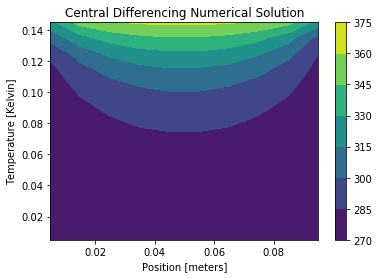

In [171]:
plt.contourf(X,Y,centralDiffSol)
plt.title('Central Differencing Numerical Solution')
plt.xlabel('Position [meters]')
plt.ylabel('Temperature [Kelvin]')
plt.colorbar()

The only worrisome part of the convergence is that its not leveling off. It does fall below the specified minimum 1e-6 residual limit. Hence why the simulation stops at that point.
I did test it with lower limits and it seems to continue to just trend linearly downwards on the semilog plot.


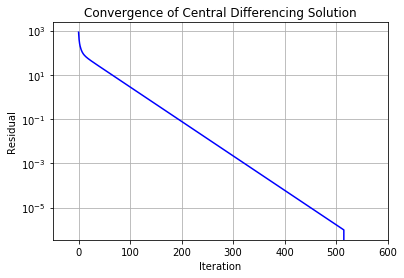

In [172]:
convX = np.linspace(0,999,1000)
plt.semilogy(convX,centralDiffConv,'b-')
plt.title('Convergence of Central Differencing Solution')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.xlim([-50,600])
plt.grid(True)
print('The only worrisome part of the convergence is that it''s not leveling off. It does fall below the specified minimum 1e-6 residual limit. Hence why the simulation stops at that point.')
print('I did test it with lower limits and it seems to continue to just trend linearly downwards on the semilog plot.')

In [173]:
# ANSYS Data read from text files
f = open('HeatedPlatexLine','r')
xData = f.readlines()[4:14]
TxData = []
xPosData = []
for x in xData:
    x = x.strip()
    columns = x.split()
    position = float(columns[0])
    temps = float(columns[1])
    TxData.append(temps)
    xPosData.append(position)
f.close()

f = open('HeatedPlateyline','r')
yData = f.readlines()[4:19]
TyData = []
yPosData = []
for y in yData:
    y = y.strip()
    columns = y.split()
    position = float(columns[0])
    temps = float(columns[1])
    TyData.append(temps)
    yPosData.append(position)
f.close()

TxData = np.flip(TxData)
TyData = np.flip(TyData)
xPosData = np.flip(xPosData)
yPosData = np.flip(yPosData)

print('I set up the mesh in ANSYS to have 15 cells in the y-direction and 10 cells in the x-direction.')

I set up the mesh in ANSYS to have 15 cells in the y-direction and 10 cells in the x-direction.


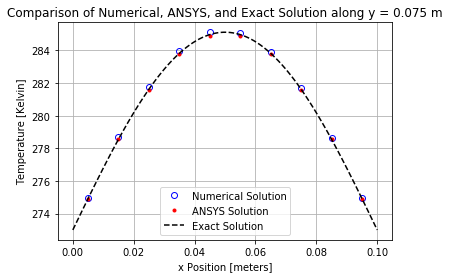

In [174]:
plt.plot(cellArrayx,centralDiffSol[7,:],'bo',markerfacecolor='none')
plt.plot(xPosData,TxData,'r.',cellArrayxExact,exactSolution[75,:],'k--')
plt.title('Comparison of Numerical, ANSYS, and Exact Solution along y = 0.075 m')
plt.grid(True)
plt.xlabel('x Position [meters]')
plt.ylabel('Temperature [Kelvin]')
plt.legend(['Numerical Solution','ANSYS Solution','Exact Solution'])

In [175]:
for i in range(0,10):
    centralDiffErrorX = abs(exactSolution[75,10*i] - centralDiffSol[7,:])/exactSolution[75,10*i]
    ANSYSErrorX = abs(exactSolution[75,10*i] - TxData)/exactSolution[75,10*i]

I thought itd be useful to see the actual error between ANSYS and the numerical solution due to the fact that in the previous 
 plot its relatively difficult to see the differences.
Its also interesting because it helps show where the highest error occurs. Here its near the center that error is the highest.
I used absolute error just because its the simplest and sufficient in showing the differences between the solutions.
You can see that the ANSYS solution fairs just slightly better than the numerical solution.


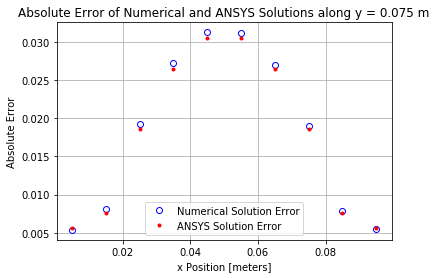

In [176]:
plt.plot(cellArrayx,centralDiffErrorX,'bo',markerfacecolor='none')
plt.plot(cellArrayx,ANSYSErrorX,'r.')
plt.title('Absolute Error of Numerical and ANSYS Solutions along y = 0.075 m')
plt.xlabel('x Position [meters]')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.legend(['Numerical Solution Error','ANSYS Solution Error'])
print('I thought it''d be useful to see the actual error between ANSYS and the numerical solution due to the fact that in the previous \n plot it''s relatively difficult to see the differences.')
print('It''s also interesting because it helps show where the highest error occurs. Here it''s near the center that error is the highest.')
print('I used absolute error just because it''s the simplest and sufficient in showing the differences between the solutions.')
print('You can see that the ANSYS solution fairs just slightly better than the numerical solution.')

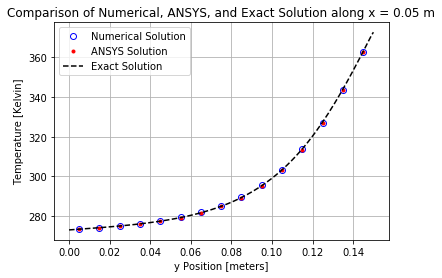

In [177]:
plt.plot(cellArrayy,centralDiffSol[:,5],'bo',markerfacecolor='none')
plt.plot(yPosData,TyData,'r.',cellArrayyExact,exactSolution[:,50],'k--')
plt.title('Comparison of Numerical, ANSYS, and Exact Solution along x = 0.05 m')
plt.grid(True)
plt.xlabel('y Position [meters]')
plt.ylabel('Temperature [Kelvin]')
plt.legend(['Numerical Solution','ANSYS Solution','Exact Solution'])

In [178]:
for i in range(0,15):
    centralDiffErrorY = abs(exactSolution[10*i,50] - centralDiffSol[:,5])/exactSolution[10*i,50]
    ANSYSErrorY = abs(exactSolution[10*i,50] - TyData)/exactSolution[10*i,50]

Along x = 0.05 m the error is highest furthest from the northern boundary. Theres relatively no difference between ANSYS and the numerical solution here.


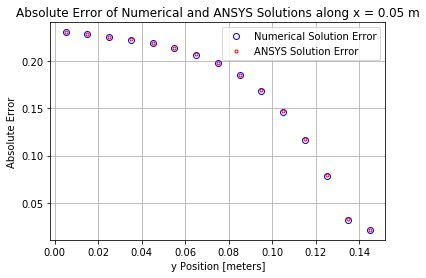

In [179]:
plt.plot(cellArrayy,centralDiffErrorY,'bo',markerfacecolor='none')
plt.plot(cellArrayy,ANSYSErrorY,'r.',markerfacecolor='none')
plt.title('Absolute Error of Numerical and ANSYS Solutions along x = 0.05 m')
plt.xlabel('y Position [meters]')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.legend(['Numerical Solution Error','ANSYS Solution Error'])
print('Along x = 0.05 m the error is highest furthest from the northern boundary. There''s relatively no difference between ANSYS and the numerical solution here.')

In [180]:
centralDiffSol2, centralDiffConv2 = centralDiff(cellx,celly,0.9)
centralDiffSol3, centralDiffConv3 = centralDiff(cellx,celly,0.5)

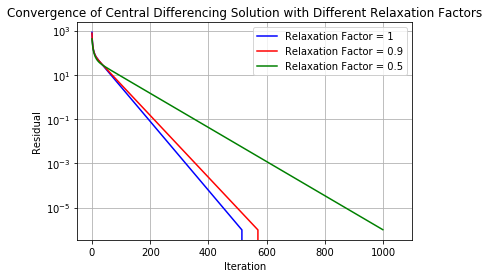

In [181]:
convX = np.linspace(0,999,1000)
plt.semilogy(convX,centralDiffConv,'b-',convX,centralDiffConv2,'r-',convX,centralDiffConv3,'g-')
plt.title('Convergence of Central Differencing Solution with Different Relaxation Factors')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.xlim([-50,1100])
plt.grid(True)
plt.legend(['Relaxation Factor = 1','Relaxation Factor = 0.9','Relaxation Factor = 0.5'])

In [182]:
print('As shown when the relaxation factor is lower it slows down the rate of convergence.')
print('I have the tolerance set to 1e-6 so when the residuals hit it they stop.')
print('With a relaxation factor of 1 it takes about 510 iterations, 0.9 takes 570 iterations, and 0.5 takes about 1000 iterations.')

As shown when the relaxation factor is lower it slows down the rate of convergence.
I have the tolerance set to 1e-6 so when the residuals hit it they stop.
With a relaxation factor of 1 it takes about 510 iterations, 0.9 takes 570 iterations, and 0.5 takes about 1000 iterations.
